In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
df = pd.read_csv('/Users/drishtant/Downloads/final_df.csv')
df.shape

(501074, 22)

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.set_index('Date', inplace=True)
df.dropna(inplace=True)
df.head()

,stid,Daily_Production,new_distances,min_dist_node,join,tcolc_eatm_0,ulwrf_tatm_0,dlwrf_sfc_0,tmp_sfc_0,tcdc_eatm_0,dswrf_sfc_0,tmax_2m_0,tmin_2m_0,pwat_eatm_0,uswrf_sfc_0,spfh_2m_0,ulwrf_sfc_0,tmp_2m_0,apcp_sfc_0,pres_msl_0
Date,,,,,,,,,,,,,,,,,,,,
19940101,ACME,12384900,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940101(35.0, 262.0)",0.002298,254.38380,258.64188,282.54855,0.001273,219.09091,284.39706,280.26060,8.086300,47.745450,0.003322,364.31980,282.35430,0.000000,102023.780
19940102,ACME,11908500,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940102(35.0, 262.0)",0.069067,231.38722,279.48965,282.33215,0.069091,166.90909,283.79266,279.78726,11.476501,32.618183,0.003798,358.07530,282.07254,0.031273,101307.500
19940103,ACME,12470700,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940103(35.0, 262.0)",0.001782,241.27985,227.04659,277.42630,0.000909,225.32729,277.42557,273.05588,6.755241,49.072730,0.002511,335.16843,275.72464,0.000000,101984.920
19940104,ACME,12725400,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940104(35.0, 262.0)",0.003251,244.66994,238.26636,277.47464,0.002727,226.21817,278.94736,275.17150,5.734901,49.527270,0.002601,342.49518,276.33093,0.000909,102571.125
19940105,ACME,10894800,"{(33.0, 257.0): 501.30264193302355, (33.0, 258...","(35.0, 262.0)","19940105(35.0, 262.0)",0.025482,242.21690,258.61813,282.66803,0.024364,219.45454,283.42203,278.55490,9.284234,46.636364,0.003136,353.97708,282.82280,0.000000,100769.320


In [4]:
df = df.rename(columns = {'Daily_Production':'Daily Solar Energy'})

In [5]:
# After correlation analysis we removed some variables from our dataset to remove the multicollinerity analysis

df_corr= df[['tcolc_eatm_0', 'tcdc_eatm_0', 'apcp_sfc_0', 'dlwrf_sfc_0',\
             'tmp_sfc_0',  'pwat_eatm_0', 'spfh_2m_0', 'ulwrf_sfc_0', 'dswrf_sfc_0', 'uswrf_sfc_0']]


In [6]:
! pip install mpl-scatter-density

The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.



### Scatter Density Plots for Top 5 features with highest correlation with label

In [7]:
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

/Users/drishtant/anaconda3/lib/python3.11/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/Users/drishtant/anaconda3/lib/python3.11/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


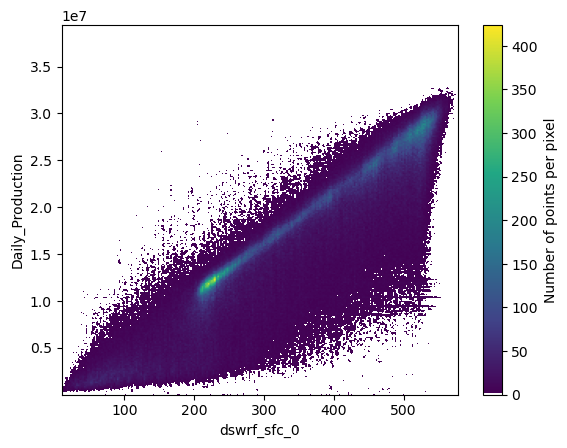

In [8]:
fig = plt.figure()

using_mpl_scatter_density(fig, df['dswrf_sfc_0'] , df['Daily Solar Energy'])
plt.xlabel('dswrf_sfc_0')
plt.ylabel('Daily_Production')

plt.show()

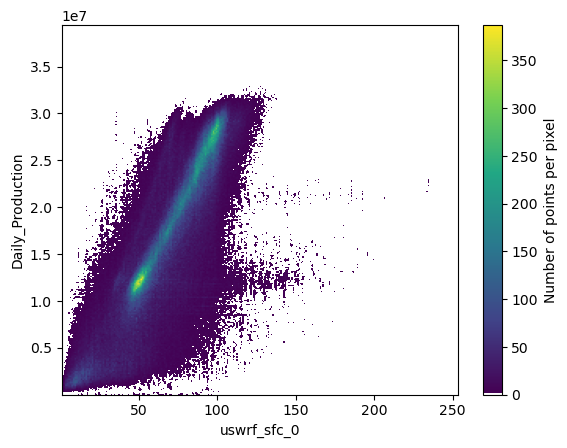

In [9]:
fig = plt.figure()
using_mpl_scatter_density(fig, df['uswrf_sfc_0'] , df['Daily Solar Energy'])
plt.xlabel('uswrf_sfc_0')
plt.ylabel('Daily_Production')
plt.show()

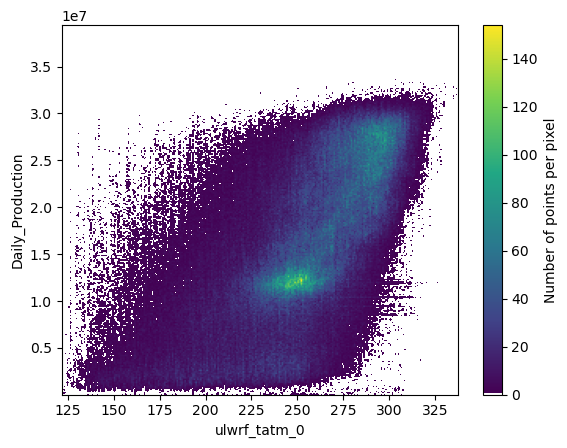

In [10]:
fig = plt.figure()
using_mpl_scatter_density(fig, df['ulwrf_tatm_0'] , df['Daily Solar Energy'])
plt.xlabel('ulwrf_tatm_0')
plt.ylabel('Daily_Production')
plt.show()

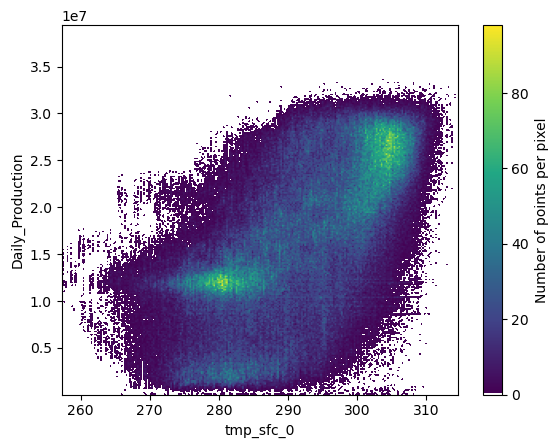

In [11]:
fig = plt.figure()

using_mpl_scatter_density(fig, df['tmp_sfc_0'] , df['Daily Solar Energy'])
plt.xlabel('tmp_sfc_0')
plt.ylabel('Daily_Production')

plt.show()

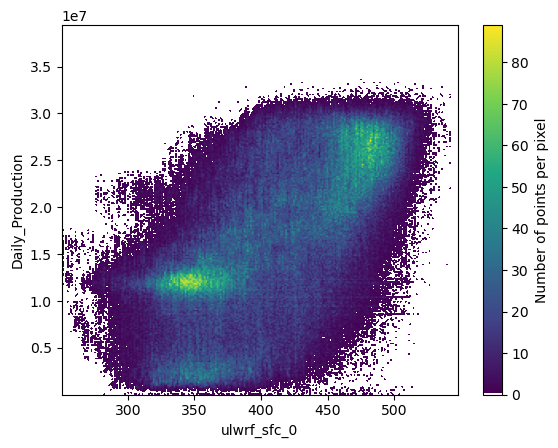

In [12]:
fig = plt.figure()
using_mpl_scatter_density(fig, df['ulwrf_sfc_0'] , df['Daily Solar Energy'])
plt.xlabel('ulwrf_sfc_0')
plt.ylabel('Daily_Production')

plt.show()

### Hierarchical Clustering in Heatmap

In [13]:
# dataframe with only features
df_ = df[['tcolc_eatm_0',"ulwrf_tatm_0","dlwrf_sfc_0",\
          'tmp_sfc_0','tcdc_eatm_0','dswrf_sfc_0','tmax_2m_0','tmin_2m_0','pwat_eatm_0','uswrf_sfc_0',\
          'spfh_2m_0','ulwrf_sfc_0','tmp_2m_0','apcp_sfc_0','pres_msl_0']]

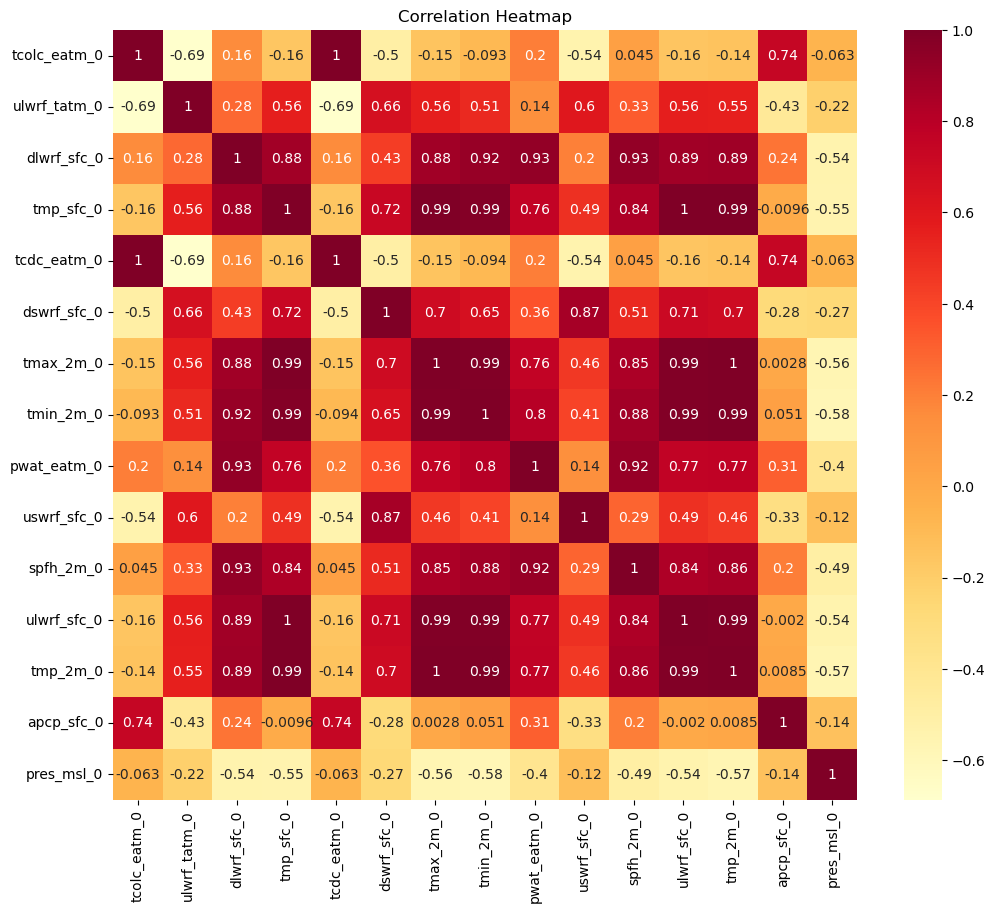

In [14]:
corr_matrix = df_.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()

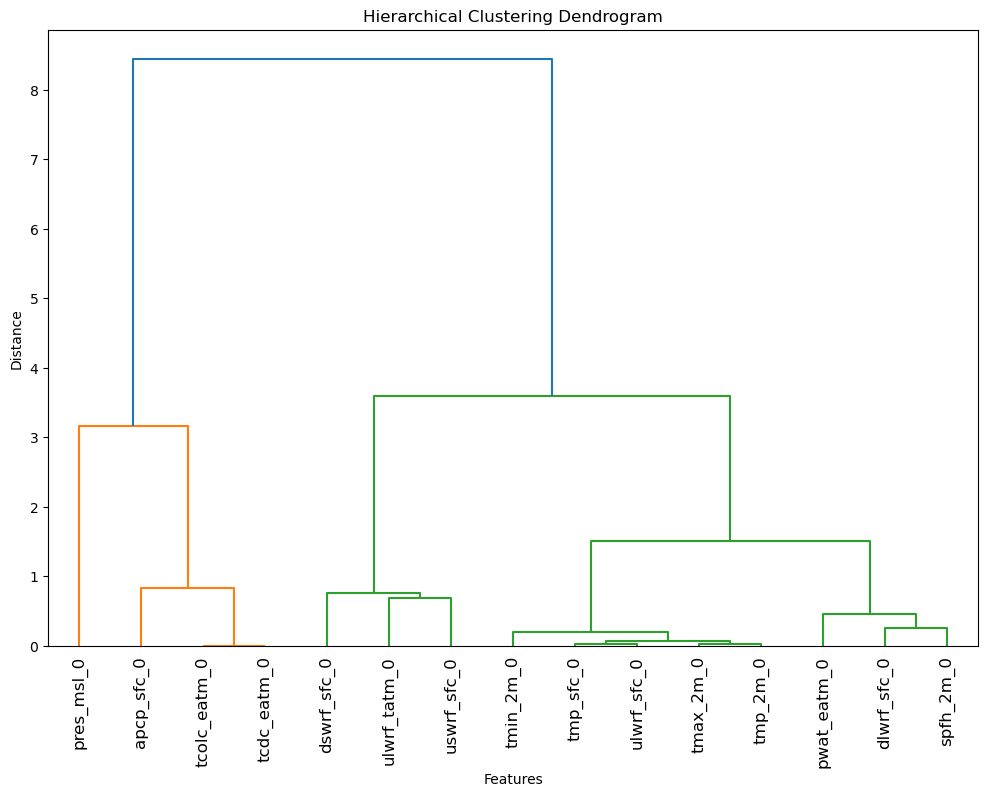

In [15]:
from scipy.cluster import hierarchy

linkage_matrix = hierarchy.linkage(corr_matrix.values, method='ward')

plt.figure(figsize=(12, 8))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=corr_matrix.columns, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

### Linear Regression

In [16]:
! pip install tensorflow

The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.



In [17]:
! pip install keras

The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.



In [18]:
# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# ML Models
from sklearn import metrics
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet, SGDRegressor, PassiveAggressiveRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Neural Net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [19]:
# defining training set and label
training_set = df_corr
y = df['Daily Solar Energy']

In [20]:
training_set.head()

,tcolc_eatm_0,tcdc_eatm_0,apcp_sfc_0,dlwrf_sfc_0,tmp_sfc_0,pwat_eatm_0,spfh_2m_0,ulwrf_sfc_0,dswrf_sfc_0,uswrf_sfc_0
Date,,,,,,,,,,
19940101,0.002298,0.001273,0.000000,258.64188,282.54855,8.086300,0.003322,364.31980,219.09091,47.745450
19940102,0.069067,0.069091,0.031273,279.48965,282.33215,11.476501,0.003798,358.07530,166.90909,32.618183
19940103,0.001782,0.000909,0.000000,227.04659,277.42630,6.755241,0.002511,335.16843,225.32729,49.072730
19940104,0.003251,0.002727,0.000909,238.26636,277.47464,5.734901,0.002601,342.49518,226.21817,49.527270
19940105,0.025482,0.024364,0.000000,258.61813,282.66803,9.284234,0.003136,353.97708,219.45454,46.636364


In [21]:
# normalize our data before applying any model , using minMax scaler
min_max_scaler = MinMaxScaler()
data_n = min_max_scaler.fit_transform(training_set)

In [22]:
# Define the start and end dates for training and testing data
def train_test_split(df):

    train_start_date = 19940101
    train_end_date = 20041231
    test_start_date = 20050101
    test_end_date = 20071231

    train_data = df[(df.index >= train_start_date) & (df.index <= train_end_date)]
    test_data = df[(df.index >= test_start_date) & (df.index <= test_end_date)]

    X_train = train_data.drop(columns=['Daily Solar Energy'])
    y_train = train_data['Daily Solar Energy']
    X_test = test_data.drop(columns=['Daily Solar Energy'])
    y_test = test_data['Daily Solar Energy']

    print("Training data shape:", X_train.shape)
    print("Testing data shape:", X_test.shape)
    
    return X_train , y_train , X_test , y_test


In [23]:
# dataframe with 10 features and labels
data= df[['tcolc_eatm_0', 'tcdc_eatm_0', 'apcp_sfc_0', 'dlwrf_sfc_0',\
             'tmp_sfc_0',  'pwat_eatm_0', 'spfh_2m_0', 'ulwrf_sfc_0',\
          'dswrf_sfc_0', 'uswrf_sfc_0','Daily Solar Energy']]


In [24]:
X_train , y_train , X_test , y_test = train_test_split(data)

Training data shape: (393764, 10)
Testing data shape: (107310, 10)


### Applying Linear Regression

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
preds_lr = model_lr.predict(X_test)
mae = metrics.mean_absolute_error(y_test,preds_lr)
print(f"MAE: {mae}")

MAE: 2419361.0733868284


In [27]:
mse = metrics.mean_squared_error(y_test, preds_lr)
print(f"MSE: {mse}")

rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

MSE: 11474311642581.717
RMSE: 3387375.332404385


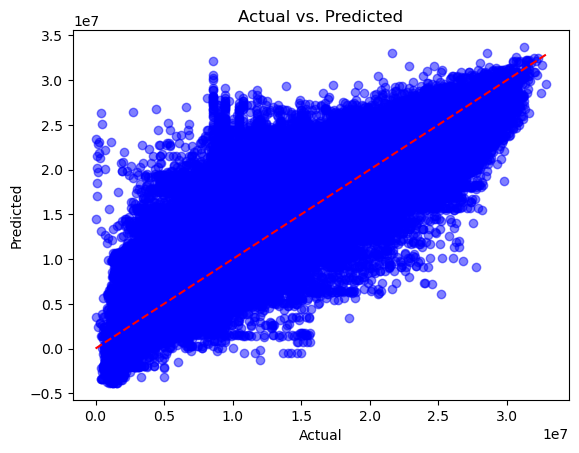

In [28]:
# Plot the regression line
plt.scatter(y_test, preds_lr, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [29]:
# Print the coefficients
print("Coefficients:", model_lr.coef_)

Coefficients: [ 1.73663569e+08 -1.67757053e+08 -2.44197945e+05 -4.56061187e+04
  4.30004102e+04 -1.59226594e+05  3.35901259e+08  5.75201842e+04
  3.85059612e+04  2.67620663e+04]


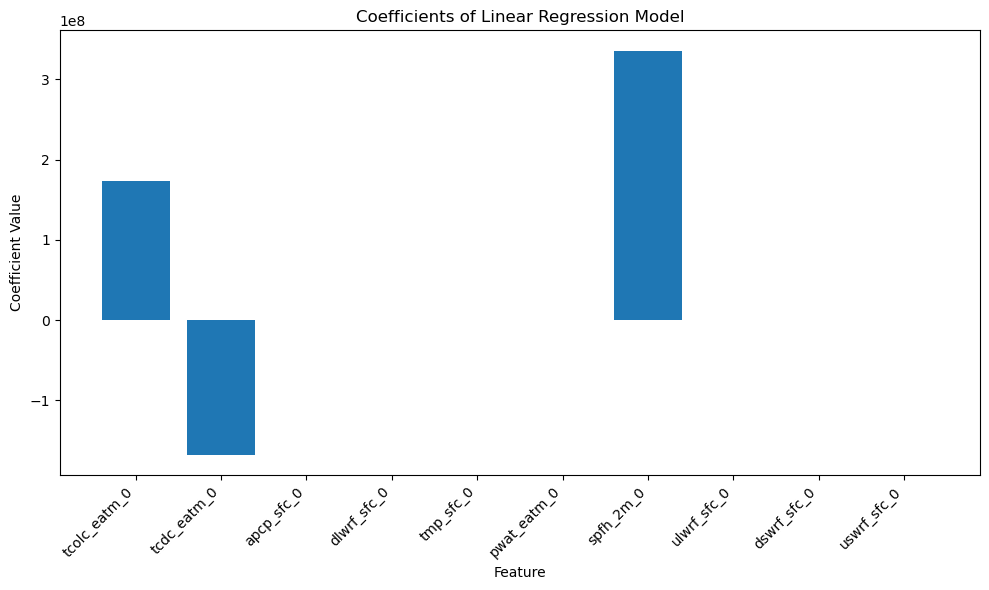

In [30]:
coefficients = model_lr.coef_

feature_names = X_train.columns

plt.figure(figsize=(10, 6))
bars = plt.bar(feature_names, coefficients)
plt.title('Coefficients of Linear Regression Model')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [31]:
coefficients = model_lr.coef_
feature_names = X_train.columns
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

tcolc_eatm_0: 173663569.0182505
tcdc_eatm_0: -167757053.07330906
apcp_sfc_0: -244197.9454671101
dlwrf_sfc_0: -45606.11873344199
tmp_sfc_0: 43000.41021604052
pwat_eatm_0: -159226.5941420499
spfh_2m_0: 335901258.9290533
ulwrf_sfc_0: 57520.18418024985
dswrf_sfc_0: 38505.961241251076
uswrf_sfc_0: 26762.06629002142


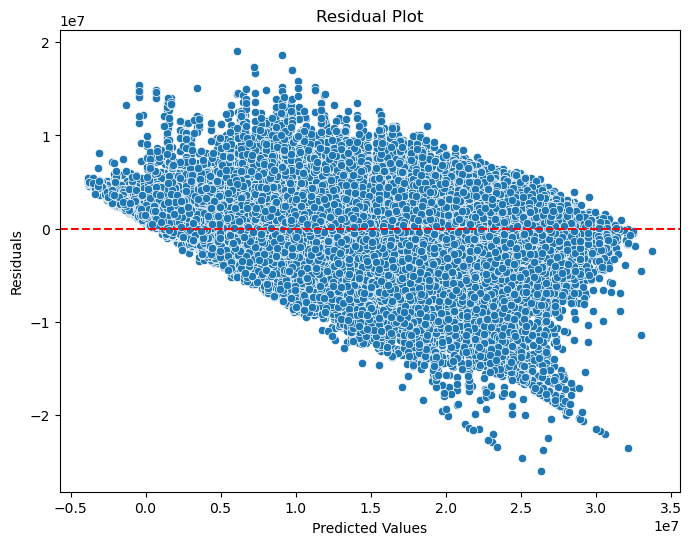

In [32]:
residuals = y_test - preds_lr

# Plot residuals against predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=preds_lr, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [33]:
r_squared = metrics.r2_score(y_test, preds_lr)
print(f"R-squared: {r_squared}")

R-squared: 0.7999382459837053


### Applying Random Forest

In [34]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
preds_rf = model_rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test,preds_rf)
print(f"MAE: {mae}")

MAE: 2256228.523557272


In [35]:
rmse = np.sqrt(mean_squared_error(y_test, preds_rf))
print(f"RMSE: {rmse}")

RMSE: 3275235.5674286587


In [36]:
print(f"R-squared: {metrics.r2_score(y_test, preds_rf)}")

R-squared: 0.8129651593064183


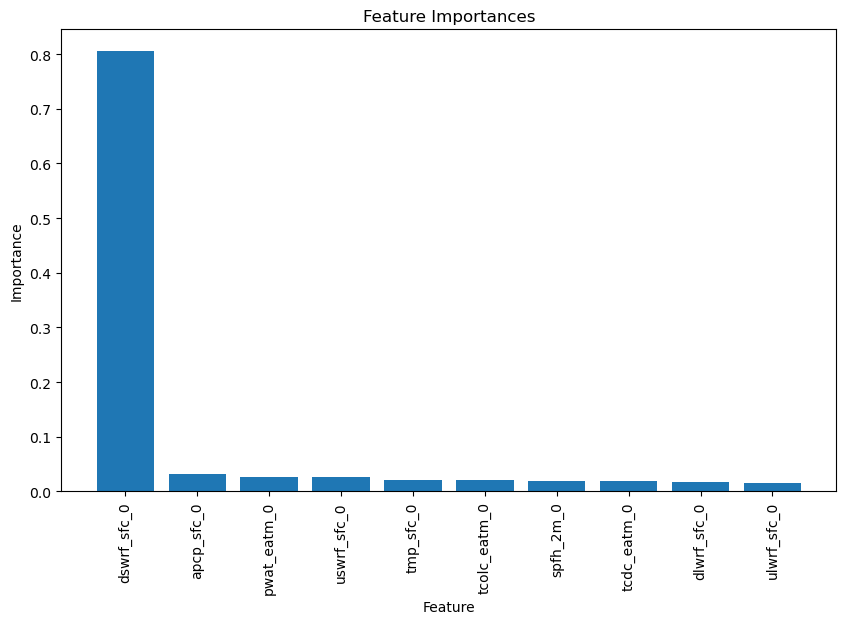

In [37]:
importances = model_rf.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


#### Hyperparameter Tuning for Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [10, 20]
}
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model_rf = grid_search.best_estimator_

#### Evaluate the best model
preds_rf = best_model_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds_rf))
r2 = r2_score(y_test, preds_rf)
mae = mean_absolute_error(y_test, preds_rf)
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")
print(f"MAE: {mae}")



### Applying XGBoost

In [38]:
! pip install xgboost


The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.



In [39]:
import xgboost as xgb


In [40]:
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [41]:
preds_xgb = model_xgb.predict(X_test)


In [42]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, preds_xgb))
r2_xgb = metrics.r2_score(y_test, preds_xgb)
mae_xgb = metrics.mean_absolute_error(y_test, preds_xgb)
print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost R-squared: {r2_xgb}")
print(f"XGBoost MAE: {mae_xgb}")


XGBoost RMSE: 3208184.6752482355
XGBoost R-squared: 0.8205447571673281
XGBoost MAE: 2186080.407569192


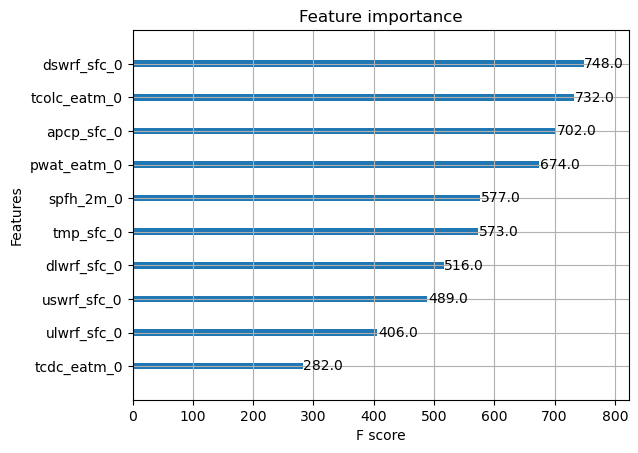

In [43]:
# Plot feature importance
xgb.plot_importance(model_xgb)
plt.show()


In [44]:
# Hyperparameter tuning for XGBoost

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [3,6,9],
    'learning_rate': [0.01, 0.05, 0.1]
}

grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model_xgb = grid_search.best_estimator_

# Best Model
preds_xgb = best_model_xgb.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, preds_xgb))
r2_xgb = metrics.r2_score(y_test, preds_xgb)
mae_xgb = metrics.mean_absolute_error(y_test, preds_xgb)
print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost R-squared: {r2_xgb}")
print(f"XGBoost MAE: {mae_xgb}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   1.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

### Applying ANN

In [45]:
import tensorflow as tf

In [46]:
from tensorflow.keras.layers import InputLayer

# build the model!
model_ann = Sequential()
model_ann.add(InputLayer(input_shape=(X_train.shape[1],)))
model_ann.add(Dense(50, activation='relu'))
model_ann.add(Dense(25, activation='relu'))
model_ann.add(Dense(1, activation='linear')) # output node
model_ann.summary() # see what your model looks like

# compile the model
model_ann.compile(optimizer='RMSprop', loss='mae', metrics=['mse'])

# early stopping callback
es = EarlyStopping(monitor='loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model_ann.fit(X_train, y_train,
                    #validation_data = (X_test_pca, y_test_pca),
                    callbacks=[es],
                    epochs=100,
                    batch_size=50,
                    verbose=1)

test_loss, test_acc = model_ann.evaluate(X_test, y_test)
# test_acc is test mse

/Users/drishtant/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,851 (7.23 KB)

 Trainable params: 1,851 (7.23 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 3s 369us/step - loss: 11820406.0000 - mse: 209216748912640.0000
Epoch 2/100
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 3s 381us/step - loss: 2979253.5000 - mse: 17697658109952.0000
Epoch 3/100
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 3s 366us/step - loss: 2584732.2500 - mse: 15619447586816.0000
Epoch 4/100
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 3s 365us/step - loss: 2546894.2500 - mse: 15274391633920.0000
Epoch 5/100
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 3s 365us/step - loss: 2525024.7500 - mse: 15048428748800.0000
Epoch 6/100
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 3s 374us/step - loss: 2502639.7500 - mse: 14877701701632.0000
Epoch 7/100
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 3s 371us/step - loss: 2500378.5000 - mse: 14824173993984.0000
Epoch 8/100
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 3s 385us/step - loss: 2482088.7500 - mse: 14657586724864.0000
Epoch 9/100
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 3s 372us/step - loss: 2474726.2500 - mse: 14552000364544.0000
Epoch 10/100
7876/7876 ━━━━━━━━━━━━━━━━━━━━ 3s 376us/

In [47]:
print("Test loss:", test_loss)
print("Test rmse:", np.sqrt(test_acc))

Test loss: 2227248.75
Test rmse: 3459268.8824964156


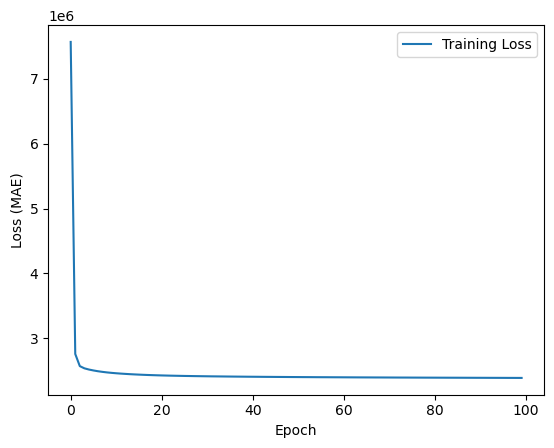

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.show()



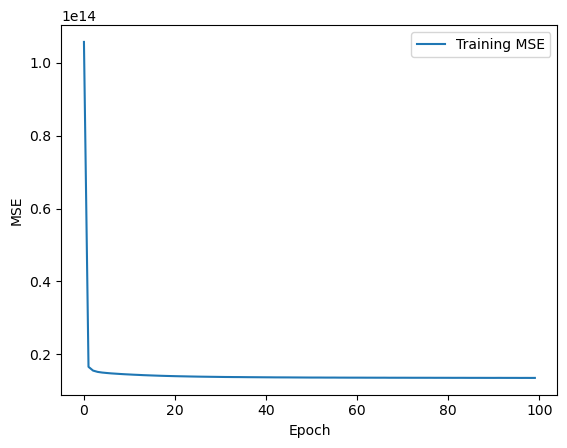

In [49]:
plt.plot(history.history['mse'], label='Training MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [50]:
print("Hello,World!")

Hello,World!


### Trying Explainable Techniques

In [51]:
! pip install shap

The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.



In [ ]:
import shap
explainer = shap.Explainer(model_rf, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X_train.columns)